In [80]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from yellowbrick.cluster import intercluster_distance
from yellowbrick.cluster.elbow import kelbow_visualizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import silhouette_visualizer

import warnings
warnings.filterwarnings("ignore")

In [5]:
labels = pd.read_pickle('../Embedding Generation/EEG_raw.pkl')['wn_id']
def avg_embeddings(embeddings_mat,labels):
    df = pd.DataFrame({'embeddings':embeddings_mat.tolist(),'labels':labels})
    df['embeddings'] = df['embeddings'].apply(lambda x:np.array(x))
    grouped_embeddings = df.groupby('labels').agg('mean').reset_index()
    return np.vstack(grouped_embeddings['embeddings'].to_numpy())

In [62]:
word_embeddings = np.load('Embeddings/word_embeddings.npy')
word_embeddings = StandardScaler().fit_transform(word_embeddings)
word_embeddings = avg_embeddings(word_embeddings,labels)

img_embeddings = np.load('Embeddings/image_embeddings.npy')
img_embeddings = StandardScaler().fit_transform(img_embeddings)
img_embeddings = avg_embeddings(img_embeddings,labels)

eeg_embeddings = np.load('Embeddings/eegnet_embeddings.npy')
# eeg_embeddings = np.load('Embeddings/timeseries_embeddings.npy')
eeg_embeddings = StandardScaler().fit_transform(eeg_embeddings)
eeg_embeddings = avg_embeddings(eeg_embeddings,labels)

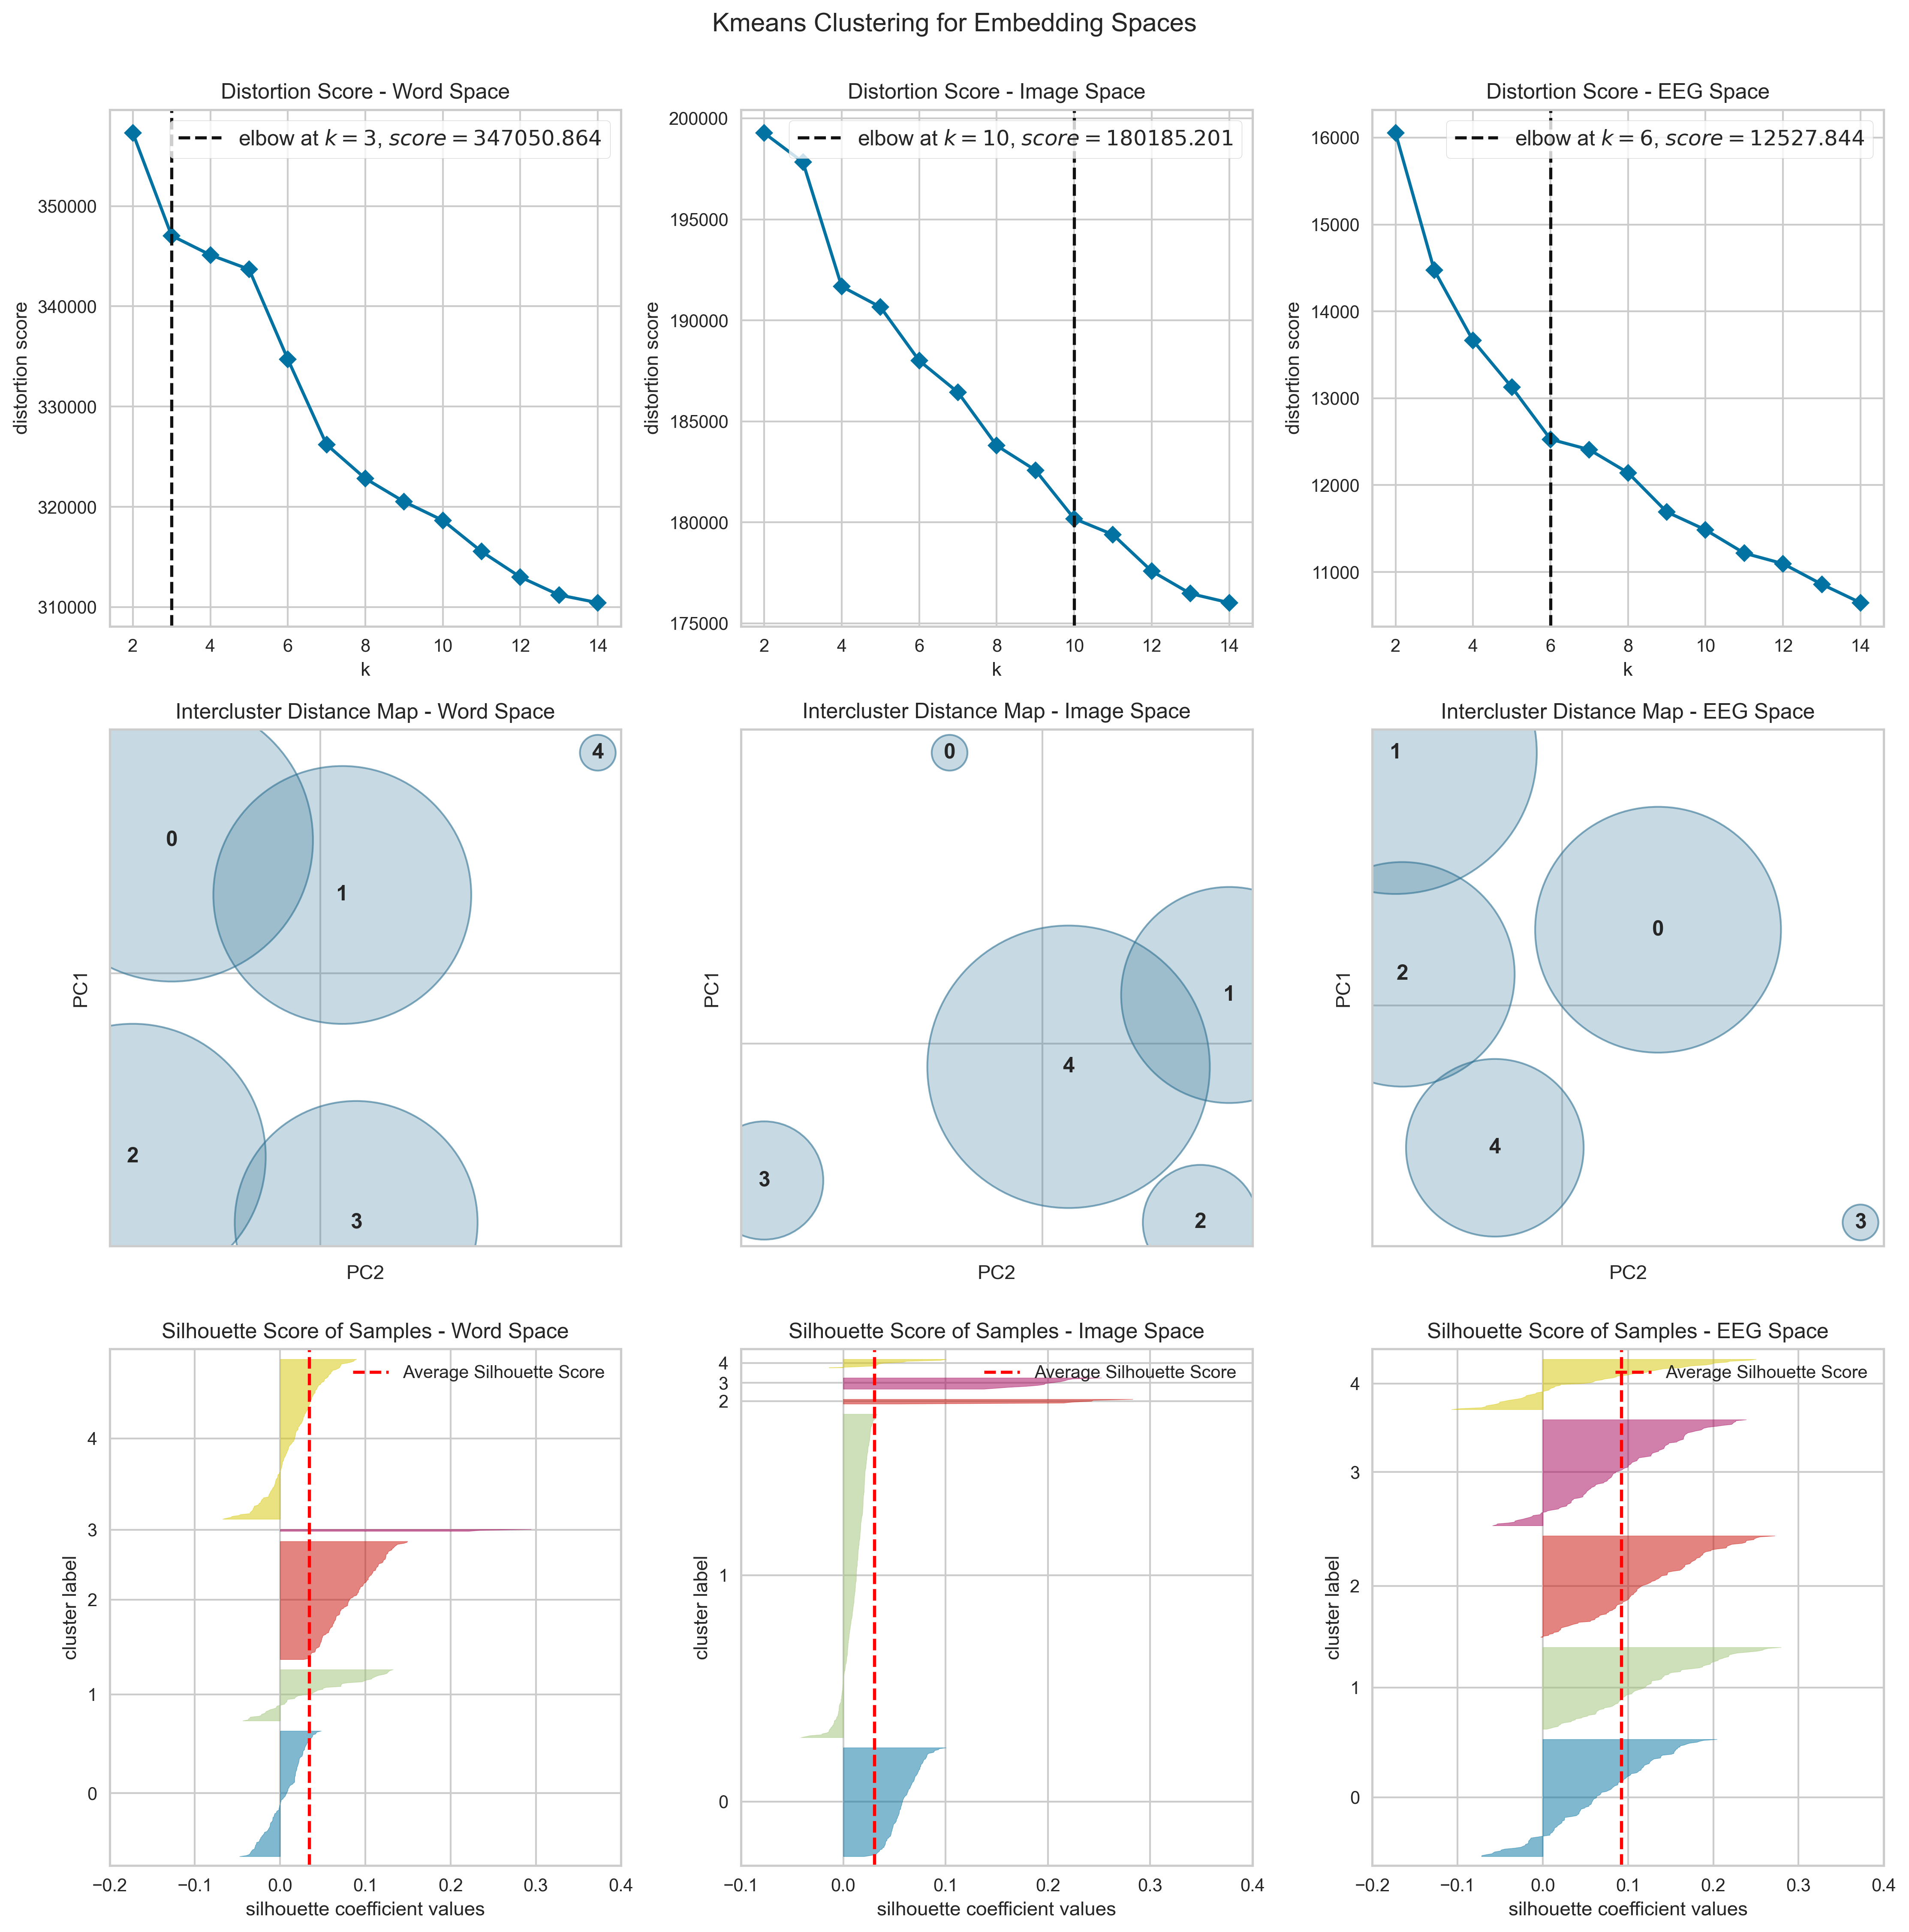

In [81]:
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(15, 15),dpi=300)

kelbow_visualizer(KMeans(random_state=4), X=word_embeddings, k=(2,15),timings=False,ax=axes[0,0],show=False,title='Distortion Score - Word Space')
kelbow_visualizer(KMeans(random_state=4), X=img_embeddings, k=(2,15),timings=False,ax=axes[0,1],show=False,title='Distortion Score - Image Space')
kelbow_visualizer(KMeans(random_state=4), X=eeg_embeddings, k=(2,15),timings=False,ax=axes[0,2],show=False,title='Distortion Score - EEG Space')

intercluster_distance(KMeans(5, random_state=100),X = word_embeddings,random_state=1,legend=False,ax=axes[1,0],show=False,title='Intercluster Distance Map - Word Space')
intercluster_distance(KMeans(5, random_state=100),X = img_embeddings,random_state=1,legend=False,ax=axes[1,1],show=False,title='Intercluster Distance Map - Image Space')
intercluster_distance(KMeans(5, random_state=100),X = eeg_embeddings,random_state=1,legend=False,ax=axes[1,2],show=False,title='Intercluster Distance Map - EEG Space')

silhouette_visualizer(KMeans(5, random_state=42), X = word_embeddings, colors='yellowbrick',ax=axes[2,0],show=False,title='Silhouette Score of Samples - Word Space')
silhouette_visualizer(KMeans(5, random_state=42), X = img_embeddings, colors='yellowbrick',ax=axes[2,1],show=False,title='Silhouette Score of Samples - Image Space')
silhouette_visualizer(KMeans(5, random_state=42), X = eeg_embeddings, colors='yellowbrick',ax=axes[2,2],show=False,title='Silhouette Score of Samples - EEG Space')

fig.suptitle('Kmeans Clustering for Embedding Spaces',y=1)
plt.tight_layout()
plt.show()